In [1]:
#!pip install praw

In [210]:
#import dependencies
import praw
from datetime import datetime
from dateutil.relativedelta import *
from dateutil.relativedelta import relativedelta
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
import requests
from sqlalchemy import create_engine
import psycopg2
%run config.ipynb

In [3]:
#Access reddit account
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent,
                     password=password,
                     username=username)


In [4]:
#create dataframe of submissions of walmart 
posts = []
i = 0
ml_subreddit = reddit.subreddit('walmart')
for post in ml_subreddit.top("all",limit=None):
#     if 'walmart' in str.lower(post.title):
        posts.append([post.id, post.subreddit, post.score, post.title, post.num_comments, datetime.fromtimestamp(post.created)])
#         print(post.title)
        i += 1
#         break
#     else:
#         i += 1
#         pass
        print(i)

posts = pd.DataFrame(posts,columns=['id', 'subreddit','score', 'title', 'num_comments', 'date_time'])
# print(posts)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [337]:
posts

,id,subreddit,score,title,num_comments,date_time,freq
847,7i0jq3,walmart,766,Who would win?,25,2017-12-06,25
943,86vgvg,walmart,728,A clear identifier,43,2018-03-24,43
967,8qhpsb,walmart,714,To the customer that took my cart and placed t...,95,2018-06-12,95
798,927htw,walmart,788,Thank You Walmart,51,2018-07-27,51
327,9eikcg,walmart,1064,mods are asleep upvote walm,26,2018-09-10,26
...,...,...,...,...,...,...,...
222,m5nakf,walmart,1182,"Union? No, Let's buy More Custom Vests Guys!",124,2021-03-15,124
988,m691p6,walmart,704,How long have I been at this store!?,60,2021-03-16,60
118,m72axo,walmart,1388,The struggle is real,57,2021-03-17,57
420,m7sdaz,walmart,988,Who keeps doing this?,42,2021-03-18,42


In [338]:
#convert date_time column format to date
posts['date_time'] = posts['date_time'].dt.date
posts

,id,subreddit,score,title,num_comments,date_time,freq
847,7i0jq3,walmart,766,Who would win?,25,2017-12-06,25
943,86vgvg,walmart,728,A clear identifier,43,2018-03-24,43
967,8qhpsb,walmart,714,To the customer that took my cart and placed t...,95,2018-06-12,95
798,927htw,walmart,788,Thank You Walmart,51,2018-07-27,51
327,9eikcg,walmart,1064,mods are asleep upvote walm,26,2018-09-10,26
...,...,...,...,...,...,...,...
222,m5nakf,walmart,1182,"Union? No, Let's buy More Custom Vests Guys!",124,2021-03-15,124
988,m691p6,walmart,704,How long have I been at this store!?,60,2021-03-16,60
118,m72axo,walmart,1388,The struggle is real,57,2021-03-17,57
420,m7sdaz,walmart,988,Who keeps doing this?,42,2021-03-18,42


In [339]:
#format date_time column by %Y-%m-%d
posts['date_time'] = pd.to_datetime(posts['date_time'], format='%Y-%m-%d')
posts

,id,subreddit,score,title,num_comments,date_time,freq
847,7i0jq3,walmart,766,Who would win?,25,2017-12-06,25
943,86vgvg,walmart,728,A clear identifier,43,2018-03-24,43
967,8qhpsb,walmart,714,To the customer that took my cart and placed t...,95,2018-06-12,95
798,927htw,walmart,788,Thank You Walmart,51,2018-07-27,51
327,9eikcg,walmart,1064,mods are asleep upvote walm,26,2018-09-10,26
...,...,...,...,...,...,...,...
222,m5nakf,walmart,1182,"Union? No, Let's buy More Custom Vests Guys!",124,2021-03-15,124
988,m691p6,walmart,704,How long have I been at this store!?,60,2021-03-16,60
118,m72axo,walmart,1388,The struggle is real,57,2021-03-17,57
420,m7sdaz,walmart,988,Who keeps doing this?,42,2021-03-18,42


In [340]:
#sort dataframe by date
posts.sort_values(by=['date_time'], inplace=True, ascending=True)
posts

,id,subreddit,score,title,num_comments,date_time,freq
847,7i0jq3,walmart,766,Who would win?,25,2017-12-06,25
943,86vgvg,walmart,728,A clear identifier,43,2018-03-24,43
967,8qhpsb,walmart,714,To the customer that took my cart and placed t...,95,2018-06-12,95
798,927htw,walmart,788,Thank You Walmart,51,2018-07-27,51
327,9eikcg,walmart,1064,mods are asleep upvote walm,26,2018-09-10,26
...,...,...,...,...,...,...,...
222,m5nakf,walmart,1182,"Union? No, Let's buy More Custom Vests Guys!",124,2021-03-15,124
988,m691p6,walmart,704,How long have I been at this store!?,60,2021-03-16,60
118,m72axo,walmart,1388,The struggle is real,57,2021-03-17,57
420,m7sdaz,walmart,988,Who keeps doing this?,42,2021-03-18,42


In [341]:
posts['freq']=posts.groupby(by='date_time')['num_comments'].transform('sum')
posts

,id,subreddit,score,title,num_comments,date_time,freq
847,7i0jq3,walmart,766,Who would win?,25,2017-12-06,25
943,86vgvg,walmart,728,A clear identifier,43,2018-03-24,43
967,8qhpsb,walmart,714,To the customer that took my cart and placed t...,95,2018-06-12,95
798,927htw,walmart,788,Thank You Walmart,51,2018-07-27,51
327,9eikcg,walmart,1064,mods are asleep upvote walm,26,2018-09-10,26
...,...,...,...,...,...,...,...
222,m5nakf,walmart,1182,"Union? No, Let's buy More Custom Vests Guys!",124,2021-03-15,124
988,m691p6,walmart,704,How long have I been at this store!?,60,2021-03-16,60
118,m72axo,walmart,1388,The struggle is real,57,2021-03-17,57
420,m7sdaz,walmart,988,Who keeps doing this?,42,2021-03-18,42


In [342]:
#groupby date and calculate the sum of score and num_comments
date_group= posts.groupby('date_time')
final=pd.DataFrame(date_group['score', 'num_comments'].agg(sum))
final.rename(columns={"date_time":"Date"}, inplace=True)
final


<ipython-input-342-f95374d986b3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final=pd.DataFrame(date_group['score', 'num_comments'].agg(sum))


,score,num_comments
date_time,,
2017-12-06,766,25
2018-03-24,728,43
2018-06-12,714,95
2018-07-27,788,51
2018-09-10,1064,26
...,...,...
2021-03-15,1182,124
2021-03-16,704,60
2021-03-17,1388,57


In [343]:
#reset the index
final_df = final.reset_index()
final_df.rename(columns={"date_time": "Date"}, inplace=True)
final_df

,Date,score,num_comments
0,2017-12-06,766,25
1,2018-03-24,728,43
2,2018-06-12,714,95
3,2018-07-27,788,51
4,2018-09-10,1064,26
...,...,...,...
618,2021-03-15,1182,124
619,2021-03-16,704,60
620,2021-03-17,1388,57
621,2021-03-18,988,42


In [344]:
#import walmart stock data
WMT = pd.read_csv("WMT_recent.csv")
WMT['Date'] = pd.to_datetime(WMT['Date'], format='%Y-%m-%d')
WMT.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
WMT

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2020-03-18,115.000000,128.080002,114.500000,122.580002,120.567329,25785300
1,2020-03-19,124.459999,127.000000,117.629997,119.449997,118.008568,19033500
2,2020-03-20,119.500000,122.790001,111.889999,113.970001,112.594704,18474500
3,2020-03-23,114.169998,117.540001,112.209999,114.279999,112.900963,13122000
4,2020-03-24,115.870003,117.370003,111.309998,115.029999,113.641907,14235000
...,...,...,...,...,...,...,...
247,2021-03-11,133.360001,133.490005,131.529999,132.130005,132.130005,11822600
248,2021-03-12,132.520004,134.520004,132.080002,134.119995,134.119995,9473500
249,2021-03-15,134.740005,134.750000,132.820007,133.429993,133.429993,8357300
250,2021-03-16,132.820007,134.279999,132.820007,133.389999,133.389999,6607200


In [381]:
#merge walmart stock data with the reddit submission dataframe
stock=final_df.merge(WMT, on=['Date'], how = 'inner')
stock

,Date,score,num_comments,Open,High,Low,Close,Adj_Close,Volume
0,2020-03-18,1628,191,115.000000,128.080002,114.500000,122.580002,120.567329,25785300
1,2020-03-19,2165,107,124.459999,127.000000,117.629997,119.449997,118.008568,19033500
2,2020-03-20,1471,156,119.500000,122.790001,111.889999,113.970001,112.594704,18474500
3,2020-03-24,2305,131,115.870003,117.370003,111.309998,115.029999,113.641907,14235000
4,2020-03-25,2921,111,112.970001,114.000000,108.050003,109.400002,108.079857,17762500
...,...,...,...,...,...,...,...,...,...
221,2021-03-11,779,68,133.360001,133.490005,131.529999,132.130005,132.130005,11822600
222,2021-03-12,1972,135,132.520004,134.520004,132.080002,134.119995,134.119995,9473500
223,2021-03-15,1182,124,134.740005,134.750000,132.820007,133.429993,133.429993,8357300
224,2021-03-16,704,60,132.820007,134.279999,132.820007,133.389999,133.389999,6607200


In [382]:
#convert the column values to int for ML
stock["Close"] = stock["Close"].astype(int)
stock["Adj_Close"] = stock["Adj_Close"].astype(int)
stock.dtypes

Date            datetime64[ns]
score                    int64
num_comments             int64
Open                   float64
High                   float64
Low                    float64
Close                    int32
Adj_Close                int32
Volume                   int64
dtype: object

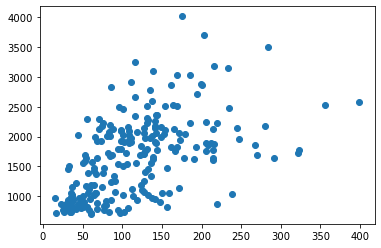

In [383]:
#plot num_comments vs score to see if there is any relation
plt.scatter(stock["num_comments"], stock["score"])
plt.show()

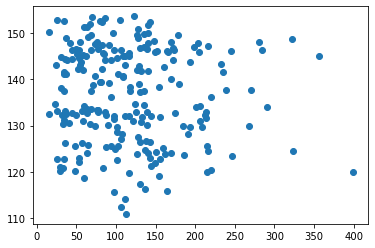

In [384]:
#plot num_comments vs High to see if there is any relation
plt.scatter(stock["num_comments"], stock["High"])
plt.show()

# Create a Logistic Regression Model

In [385]:
# Assign X (data) and y (Volume)
stock.dropna(axis=0, inplace=True)
X = stock[["score", "num_comments"]]
y = stock["Adj_Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(226, 2) (226, 1)


In [409]:
print(X)

     score  num_comments
0     1628           191
1     2165           107
2     1471           156
3     2305           131
4     2921           111
..     ...           ...
221    779            68
222   1972           135
223   1182           124
224    704            60
225   1388            57

[226 rows x 2 columns]


In [410]:
print(y)

0      120
1      118
2      112
3      113
4      108
      ... 
221    132
222    134
223    133
224    133
225    132
Name: Adj_Close, Length: 226, dtype: int32


In [386]:
#Split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [387]:
#Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [388]:

classifier.fit(X_train, y_train)

C:\Users\hanie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hanie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [389]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.09467455621301775
Testing Data Score: 0.03508771929824561


# Create a StandardScaler model

In [390]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [391]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [392]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

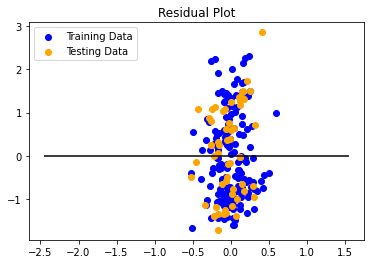

In [393]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [394]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.089693133266072, R2: -0.07501170918423239


# Create KNeighborsClassifier

In [395]:
y = stock["Adj_Close"]
target_names = ["negative", "positive"]
X = stock[["score", "num_comments"]]

In [396]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [397]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [398]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.035
k: 3, Train/Test Score: 0.331/0.053
k: 5, Train/Test Score: 0.231/0.053
k: 7, Train/Test Score: 0.243/0.053
k: 9, Train/Test Score: 0.219/0.070
k: 11, Train/Test Score: 0.189/0.053
k: 13, Train/Test Score: 0.189/0.053
k: 15, Train/Test Score: 0.183/0.035
k: 17, Train/Test Score: 0.178/0.018
k: 19, Train/Test Score: 0.136/0.035
k: 21, Train/Test Score: 0.124/0.018
k: 23, Train/Test Score: 0.130/0.035
k: 25, Train/Test Score: 0.148/0.035
k: 27, Train/Test Score: 0.154/0.035
k: 29, Train/Test Score: 0.124/0.035
k: 31, Train/Test Score: 0.107/0.053
k: 33, Train/Test Score: 0.101/0.035
k: 35, Train/Test Score: 0.095/0.035
k: 37, Train/Test Score: 0.107/0.053
k: 39, Train/Test Score: 0.101/0.035


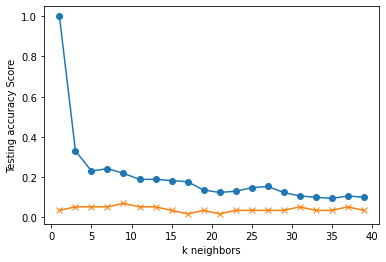

In [399]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [400]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.053


# Create linear regression equation and plot

Sum of Upvotes Linear Equation: y = 0.0009x + 132.57 R-value: 0.05


<Figure size 432x288 with 0 Axes>

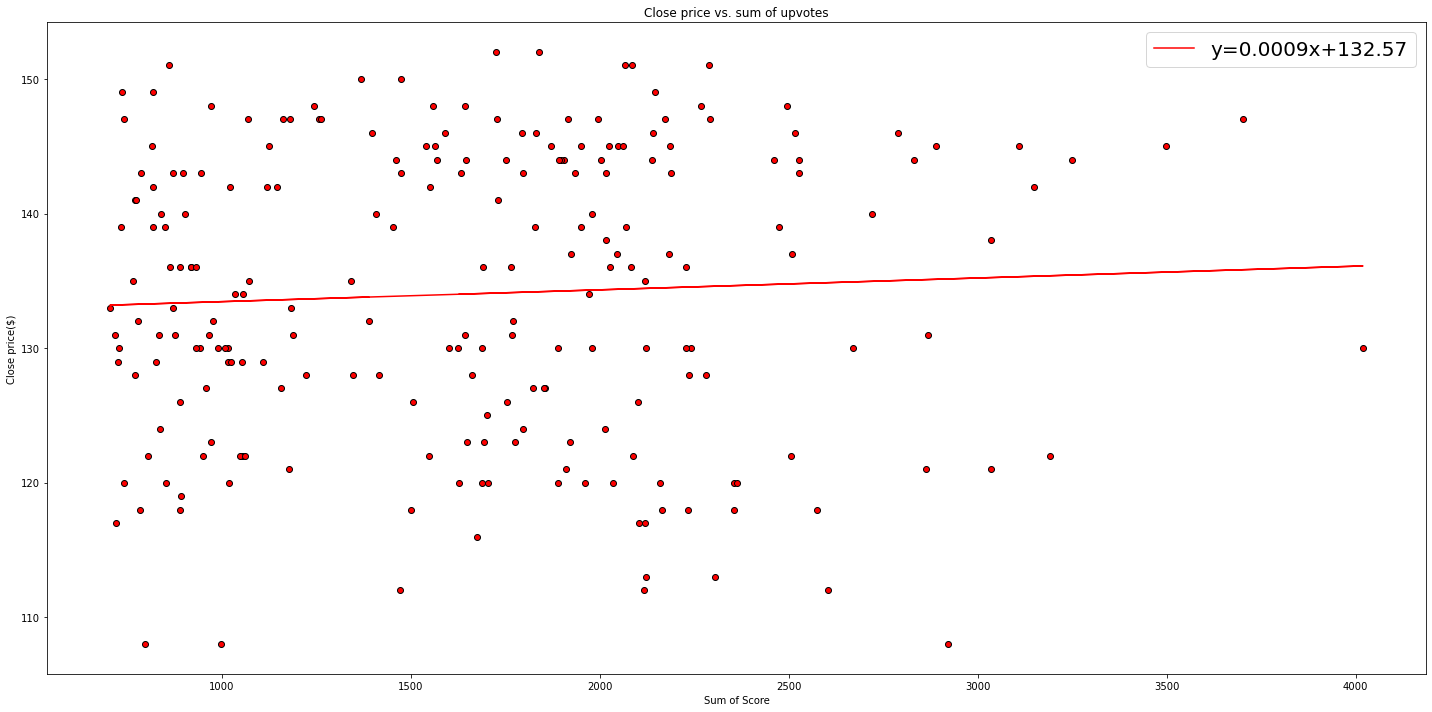

In [401]:
close_price = stock["Adj_Close"]
sum_score = stock["score"]
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()
 
plt.title("Close price vs. sum of upvotes")
plt.xlabel("Sum of Score")
plt.ylabel("Close price($)")
plt.grid()
plt.scatter(sum_score, close_price, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = stats.linregress(sum_score, close_price)
line1= slope*sum_score+intercept
line_eq = 'y = ' + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("Sum of Upvotes Linear Equation:", line_eq, "R-value:",round(r_value,2))

plt.plot(sum_score, line1, 'r', label='y={:.4f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=20)

plt.tight_layout()

Sum of comments Linear Equation: y = -0.0103x + 135.24 R-value: -0.07


<Figure size 432x288 with 0 Axes>

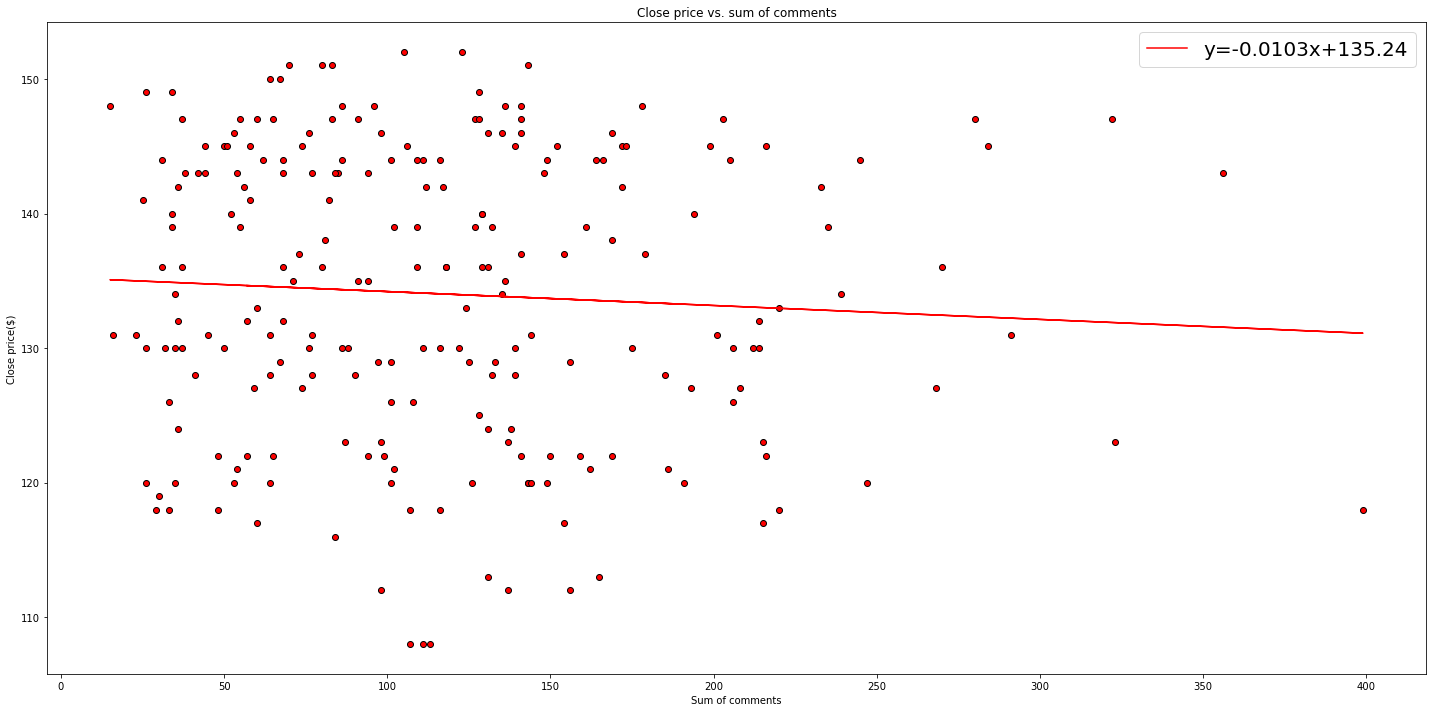

In [402]:
close_price = stock["Adj_Close"]
sum_comments = stock["num_comments"]
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

plt.title("Close price vs. sum of comments")
plt.xlabel("Sum of comments")
plt.ylabel("Close price($)")
plt.grid()
plt.scatter(sum_comments, close_price, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')


slope, intercept, r_value, p_value, std_err = stats.linregress(sum_comments, close_price)
line2 = slope*sum_comments+intercept
line_eq = 'y = ' + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("Sum of comments Linear Equation:", line_eq, "R-value:",round(r_value,2))

plt.plot(sum_comments, line2, 'r', label='y={:.4f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=20)

plt.tight_layout()

# Add some useful columns to dataframe

In [403]:
#percent change
stock['High_Low_pct']=(stock['High']-stock['Low']).pct_change()
#moving average
stock['ewm_5']=stock['Close'].ewm(span=5).mean().shift(periods=1)
#std dev of the price over the past 5 days (how volitile the stock is)
stock['price_std_5']=stock['Close'].rolling(center=False, window=5).std().shift(periods=1)
#daily volume percent change
stock['volume_Change']=stock['Volume'].pct_change()
#Average Volume for th past 5 days
stock['volume_avg_5']=stock['Volume'].rolling(center=False, window=5).mean().shift(periods=1)

stock['volume_Close']=stock['Volume'].rolling(center=False,window=5).std().shift(periods=1)

In [404]:
stock_refined=stock.dropna(axis=0)
stock_refined

,Date,score,num_comments,Open,High,Low,Close,Adj_Close,Volume,High_Low_pct,ewm_5,price_std_5,volume_Change,volume_avg_5,volume_Close
5,2020-03-26,999,113,109.400002,110.870003,106.849998,109,108,19416900,-0.324369,113.341232,5.079370,0.093140,19058160.0,4.199324e+06
6,2020-03-27,796,107,110.110001,112.279999,108.599998,109,108,12053500,-0.084578,111.754887,4.242641,-0.379226,17784480.0,2.079679e+06
7,2020-03-30,2123,165,111.860001,115.800003,110.940002,115,113,9737500,0.320652,110.779505,2.828427,-0.192143,16388480.0,3.116098e+06
8,2020-03-31,2605,137,114.309998,116.190002,112.639999,113,112,8752800,-0.269547,112.243458,3.286335,-0.101125,14641080.0,3.983004e+06
9,2020-04-01,2117,98,112.150002,115.529999,111.800003,114,112,9423200,0.050702,112.502373,2.828427,0.076593,13544640.0,4.794615e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2021-03-11,779,68,133.360001,133.490005,131.529999,132,132,11822600,-0.572051,130.061626,1.923538,-0.209703,12352580.0,2.504876e+06
222,2021-03-12,1972,135,132.520004,134.520004,132.080002,134,134,9473500,0.244895,130.707751,2.302173,-0.198696,12770120.0,2.100866e+06
223,2021-03-15,1182,124,134.740005,134.750000,132.820007,133,133,8357300,-0.209020,131.805167,2.449490,-0.117823,11647340.0,2.052395e+06
224,2021-03-16,704,60,132.820007,134.279999,132.820007,133,133,6607200,-0.243525,132.203445,2.280351,-0.209410,11048840.0,2.539396e+06


# Create Linear regression 

In [411]:
#stock_refined_train=stock_refined[stock_refined['Date']<datetime(2021, 1, 1)]
stock_refined_train=stock_refined
stock_refined_test=stock_refined[stock_refined['Date']>=datetime(2021, 1, 1)]
dates=stock_refined_test['Date']

In [412]:
lr=LinearRegression()

In [413]:
stock_refined_train.columns

Index(['Date', 'score', 'num_comments', 'Open', 'High', 'Low', 'Close',
       'Adj_Close', 'Volume', 'High_Low_pct', 'ewm_5', 'price_std_5',
       'volume_Change', 'volume_avg_5', 'volume_Close'],
      dtype='object')

In [414]:
# X_train=stock_refined_train[['score', 'num_comments', 'Open', 'High', 'Low',
#        'Adj Close', 'Volume', 'high-low_pct', 'ma_5', 'price_std_5',
#        'volume_change_pct', 'volume_avg_5', 'vol_close_ratio']]

X_train=stock_refined_train[['score']]

Y_train=stock_refined_train[['Close']]

lr.fit(X_train, Y_train)

LinearRegression()

In [415]:
# X_test=stock_refined_test[['score', 'num_comments', 'Open', 'High', 'Low',
#        'Adj Close', 'Volume', 'high-low_pct', 'ma_5', 'price_std_5',
#        'volume_change_pct', 'volume_avg_5', 'vol_close_ratio']]

X_test=stock_refined_test[['score']]

Y_test=stock_refined_test[['Close']]


close_predictions=lr.predict(X_test)



In [416]:
mae=sum(abs(close_predictions-stock_refined_test[['Close']].values))/stock_refined_test.shape[0]

mae

array([6.71860412])

In [417]:
lr.score(X_train, Y_train)

0.00763503703592705

In [418]:
lr.score(X_test, Y_test)

-0.40845810709974417

In [420]:
lr.coef_
lr.intercept_

array([132.88547708])

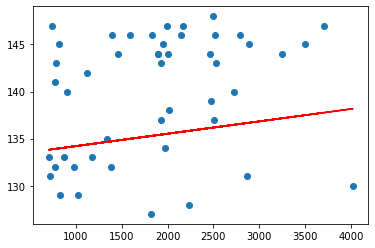

In [426]:
plt.scatter(stock_refined_test[['score']],stock_refined_test[['Close']])

y = lr.coef_*stock_refined_test[['score']]+lr.intercept_
plt.plot(stock_refined_test[['score']], y, '-r', label='Line equation')

In [443]:
lr.intercept_[0]

132.88547707598715

In [449]:
lr.coef_[0]

array([0.00131629])

In [440]:
stock_refined['intercept'] = lr.intercept_[0]
stock_refined.head()

<ipython-input-440-be6fa1603b4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_refined['intercept'] = lr.intercept_[0]


,Date,score,num_comments,Open,High,Low,Close,Adj_Close,Volume,High_Low_pct,ewm_5,price_std_5,volume_Change,volume_avg_5,volume_Close,y,intercept
5,2020-03-26,999,113,109.400002,110.870003,106.849998,109,108,19416900,-0.324369,113.341232,5.079370,0.093140,19058160.0,4.199324e+06,NaN,132.885477
6,2020-03-27,796,107,110.110001,112.279999,108.599998,109,108,12053500,-0.084578,111.754887,4.242641,-0.379226,17784480.0,2.079679e+06,NaN,132.885477
7,2020-03-30,2123,165,111.860001,115.800003,110.940002,115,113,9737500,0.320652,110.779505,2.828427,-0.192143,16388480.0,3.116098e+06,NaN,132.885477
8,2020-03-31,2605,137,114.309998,116.190002,112.639999,113,112,8752800,-0.269547,112.243458,3.286335,-0.101125,14641080.0,3.983004e+06,NaN,132.885477
9,2020-04-01,2117,98,112.150002,115.529999,111.800003,114,112,9423200,0.050702,112.502373,2.828427,0.076593,13544640.0,4.794615e+06,NaN,132.885477


In [441]:
stock_refined['y']=lr.coef_[0]*stock_refined['score']+stock_refined['intercept']
stock_refined.head()

<ipython-input-441-381dd2b9b1f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_refined['y']=lr.coef_[0]*stock_refined['score']+stock_refined['intercept']


,Date,score,num_comments,Open,High,Low,Close,Adj_Close,Volume,High_Low_pct,ewm_5,price_std_5,volume_Change,volume_avg_5,volume_Close,y,intercept
5,2020-03-26,999,113,109.400002,110.870003,106.849998,109,108,19416900,-0.324369,113.341232,5.079370,0.093140,19058160.0,4.199324e+06,134.200451,132.885477
6,2020-03-27,796,107,110.110001,112.279999,108.599998,109,108,12053500,-0.084578,111.754887,4.242641,-0.379226,17784480.0,2.079679e+06,133.933244,132.885477
7,2020-03-30,2123,165,111.860001,115.800003,110.940002,115,113,9737500,0.320652,110.779505,2.828427,-0.192143,16388480.0,3.116098e+06,135.679961,132.885477
8,2020-03-31,2605,137,114.309998,116.190002,112.639999,113,112,8752800,-0.269547,112.243458,3.286335,-0.101125,14641080.0,3.983004e+06,136.314413,132.885477
9,2020-04-01,2117,98,112.150002,115.529999,111.800003,114,112,9423200,0.050702,112.502373,2.828427,0.076593,13544640.0,4.794615e+06,135.672063,132.885477


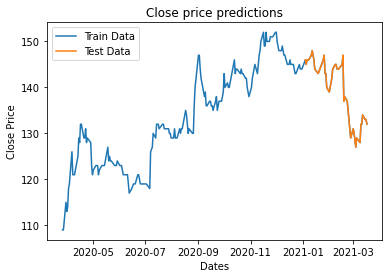

In [327]:

x1=stock_refined_train['Date']
y1=Y_train
plt.plot(x1, y1, label = "Train Data")
x2=stock_refined_test['Date']
y2=Y_test
plt.plot(x2, y2, label = "Test Data")
plt.xlabel('Dates')

# Set the y axis label of the current axis.
plt.ylabel('Close Price')
# Set a title of the current axes.
plt.title('Close price predictions')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [328]:
# Set Date as index
stock.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
stock.sort_values('Date',ascending=True)

,score,num_comments,Open,High,Low,Close,Adj_Close,Volume,High-Low_pct,ewm_5,price_std_5,volume_Change,volume_avg_5,volume_Close
Date,,,,,,,,,,,,,,
2020-03-18,1628,191,115.000000,128.080002,114.500000,122,120,25785300,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19,2165,107,124.459999,127.000000,117.629997,119,118,19033500,-0.310015,122.000000,NaN,-0.261847,NaN,NaN
2020-03-20,1471,156,119.500000,122.790001,111.889999,113,112,18474500,0.163287,120.200000,NaN,-0.029369,NaN,NaN
2020-03-24,2305,131,115.870003,117.370003,111.309998,115,113,14235000,-0.444036,116.789474,NaN,-0.229478,NaN,NaN
2020-03-25,2921,111,112.970001,114.000000,108.050003,109,108,17762500,-0.018153,116.046154,NaN,0.247805,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-11,779,68,133.360001,133.490005,131.529999,132,132,11822600,-0.572051,130.061626,1.923538,-0.209703,12352580.0,2.504876e+06
2021-03-12,1972,135,132.520004,134.520004,132.080002,134,134,9473500,0.244895,130.707751,2.302173,-0.198696,12770120.0,2.100866e+06
2021-03-15,1182,124,134.740005,134.750000,132.820007,133,133,8357300,-0.209020,131.805167,2.449490,-0.117823,11647340.0,2.052395e+06


In [329]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj_Close"], asset, c = next(colors))
        ax.set_xlabel("Adj_Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

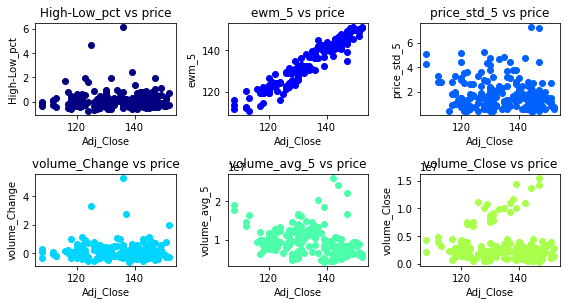

In [330]:
variables = stock.columns[-6:]  
correlation(stock,variables,3,3)

In [444]:
outputfile="stock2020.csv"
stock_refined.to_csv(outputfile, header = True, index=False)

In [445]:
engine=create_engine(f"postgres:{connection_string}")

In [446]:
stock_refined.to_sql(name="stock2020", con=engine, if_exists='append', index=False)

In [447]:
engine.execute('ALTER TABLE "stock2020" ADD PRIMARY KEY ("Date")')